## STANDARIZE JSON TO DF

In [115]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [36]:
bitcoin = yf.Ticker("BTC-INR")

In [37]:
bitcoin.info

{'name': 'Bitcoin',
 'startDate': 1278979200,
 'description': 'Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,718,650. The last known price of Bitcoin is 61,442.46555255 USD and is up 0.97 over the last 24 hours. It is currently trading on 11335 active market(s) with $13,321,545,748.80 traded over the last 24 hours. More information can be found at https://bitcoin.org/.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 5076126.5,
 'open': 5076126.5,
 'dayLow': 5055932.5,
 'dayHigh': 5137473.0,
 'regularMarketPreviousClose': 5076126.5,
 'regularMarketOpen': 5076126.5,
 'regularMarketDayLow': 5055932.5,
 'regularMarketDayHigh': 5137473.0,
 'volume': 1106426724352,
 'regularMarketVolume': 1106426724352,
 'averageVolume': 2391088141186,
 'averageVolume10days': 1891405752675,
 'averageDailyVolume10Day': 1891405752675,
 'marketCap': 101156764254208,
 'fiftyTwoWeekLow': 2066610.6,
 'fift

In [38]:
bitcoin.history(period='5d')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-06-26 00:00:00+00:00,5029019.5,5193680.5,5026805.0,5155493.0,2435847126294,0.0,0.0
2024-06-27 00:00:00+00:00,5154244.5,5209382.5,5072530.5,5082688.0,1881081849152,0.0,0.0
2024-06-28 00:00:00+00:00,5082683.5,5196588.0,5058351.0,5140992.5,1771813795267,0.0,0.0
2024-06-29 00:00:00+00:00,5141660.0,5185904.5,5002092.0,5028748.0,2080261872318,0.0,0.0
2024-06-30 00:00:00+00:00,5076126.5,5137473.0,5055932.5,5130001.5,1106426724352,0.0,0.0


In [39]:
df=bitcoin.history(start='2001-01-19', end='2022-05-13', actions=False)

In [40]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,2.844333e+04,2.854223e+04,2.755250e+04,2.785164e+04,1282359120
2014-09-18 00:00:00+00:00,2.782277e+04,2.782277e+04,2.508574e+04,2.577412e+04,2093992320
2014-09-19 00:00:00+00:00,2.575365e+04,2.598884e+04,2.336609e+04,2.402334e+04,2307413745
2014-09-20 00:00:00+00:00,2.401585e+04,2.575756e+04,2.372438e+04,2.488181e+04,2243150060
2014-09-21 00:00:00+00:00,2.483197e+04,2.509612e+04,2.392506e+04,2.426826e+04,1617399085
...,...,...,...,...,...
2022-05-08 00:00:00+00:00,2.732061e+06,2.732061e+06,2.607091e+06,2.621124e+06,2829200767989
2022-05-09 00:00:00+00:00,2.621182e+06,2.635168e+06,2.343956e+06,2.343956e+06,4901564644382
2022-05-10 00:00:00+00:00,2.342153e+06,2.520167e+06,2.318014e+06,2.397190e+06,4621694667072


## EXPLORE DATASET

In [41]:
df.index

DatetimeIndex(['2014-09-17 00:00:00+00:00', '2014-09-18 00:00:00+00:00',
               '2014-09-19 00:00:00+00:00', '2014-09-20 00:00:00+00:00',
               '2014-09-21 00:00:00+00:00', '2014-09-22 00:00:00+00:00',
               '2014-09-23 00:00:00+00:00', '2014-09-24 00:00:00+00:00',
               '2014-09-25 00:00:00+00:00', '2014-09-26 00:00:00+00:00',
               ...
               '2022-05-03 00:00:00+00:00', '2022-05-04 00:00:00+00:00',
               '2022-05-05 00:00:00+00:00', '2022-05-06 00:00:00+00:00',
               '2022-05-07 00:00:00+00:00', '2022-05-08 00:00:00+00:00',
               '2022-05-09 00:00:00+00:00', '2022-05-10 00:00:00+00:00',
               '2022-05-11 00:00:00+00:00', '2022-05-12 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=2795, freq=None)

In [42]:
df.shape

(2795, 5)

In [43]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [44]:
df=df.drop(['Open','High','Volume','Low'],axis=1)

In [45]:
df.head()

,Close
Date,
2014-09-17 00:00:00+00:00,27851.640625
2014-09-18 00:00:00+00:00,25774.119141
2014-09-19 00:00:00+00:00,24023.335938
2014-09-20 00:00:00+00:00,24881.808594
2014-09-21 00:00:00+00:00,24268.257812


In [46]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

Text(0.5, 0, 'Time')

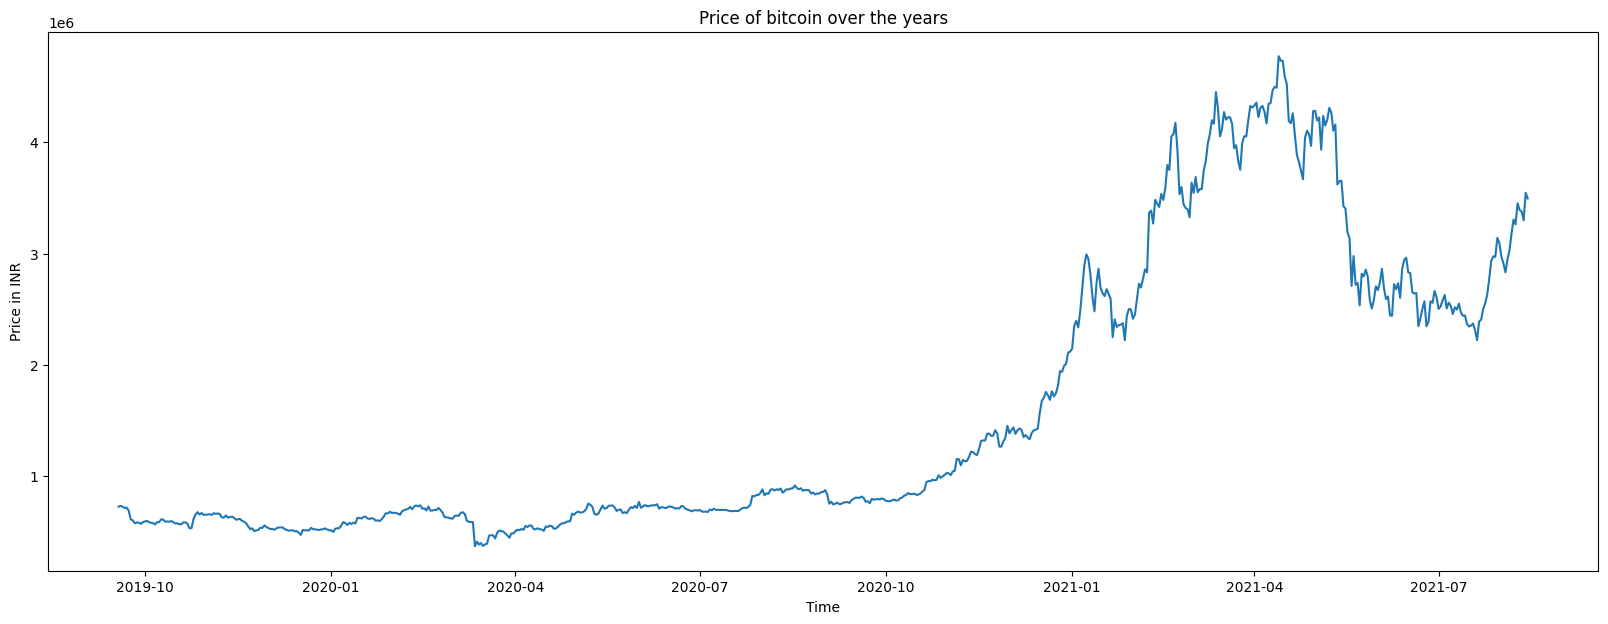

In [47]:
plt.figure(figsize=(20,7))
plt.title("Price of bitcoin over the years")
plt.plot(df['2019-09-18':'2021-08-14'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

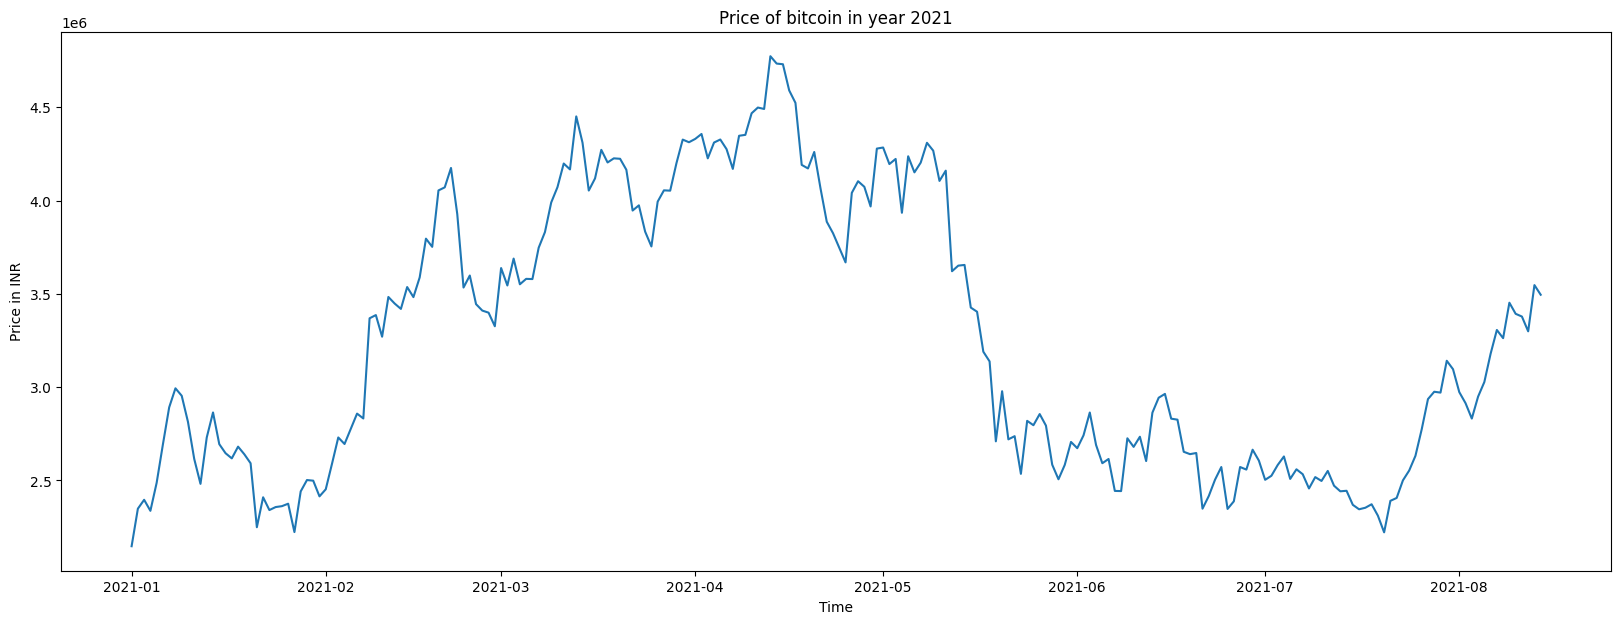

In [50]:
plt.figure(figsize=(20,7))
plt.title("Price of bitcoin in year 2021")
plt.plot(df['2021-01-01':'2021-08-14'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

In [51]:
data=df.values

In [52]:
data

array([[  27851.640625  ],
       [  25774.11914062],
       [  24023.3359375 ],
       ...,
       [2397189.5       ],
       [2240213.5       ],
       [2249575.25      ]])

In [53]:
len(data)

2795

In [54]:
import math

In [55]:
train_len=math.ceil(len(data)*0.92)

In [56]:
train_len

2572

## PREPROCESS

In [57]:
min_max_scalar=MinMaxScaler(feature_range=(0,1))

In [58]:
scaled_data=min_max_scalar.fit_transform(data)

In [59]:
len(scaled_data)

2795

In [60]:
scaled_data

array([[0.00336983],
       [0.00295295],
       [0.00260162],
       ...,
       [0.47881612],
       [0.44731632],
       [0.44919491]])

In [61]:
train_data=scaled_data[0:train_len,:]

In [62]:
len(train_data)

2572

In [63]:
interval=60

In [64]:
x_train=[]
y_train=[]

for i in range(interval,len(train_data)):
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])

In [65]:
x_train

[array([0.00336983, 0.00295295, 0.00260162, 0.00277389, 0.00265077,
        0.0026979 , 0.00311881, 0.00295531, 0.00284613, 0.00274273,
        0.00268255, 0.00240848, 0.00241797, 0.00258922, 0.0025313 ,
        0.00241234, 0.0022202 , 0.00184179, 0.00173861, 0.00185676,
        0.00191566, 0.00212595, 0.00225203, 0.00222629, 0.00223535,
        0.00243514, 0.00255948, 0.00271883, 0.00264254, 0.00251895,
        0.00250535, 0.00259994, 0.0025766 , 0.00248412, 0.00252212,
        0.00248527, 0.00217971, 0.00217883, 0.00204292, 0.00213414,
        0.0021223 , 0.00217084, 0.00190732, 0.00203715, 0.00194869,
        0.00179382, 0.00179558, 0.00181737, 0.00184528, 0.00196509,
        0.00209083, 0.00200703, 0.00204496, 0.00226435, 0.00230694,
        0.00231903, 0.00299621, 0.00298083, 0.00270678, 0.00243827]),
 array([0.00295295, 0.00260162, 0.00277389, 0.00265077, 0.0026979 ,
        0.00311881, 0.00295531, 0.00284613, 0.00274273, 0.00268255,
        0.00240848, 0.00241797, 0.00258922, 0.

In [66]:
y_train

[0.0025837478455049715,
 0.0025868189806570584,
 0.002427446035500762,
 0.0025102063867156917,
 0.00222720300692695,
 0.0021292370877570013,
 0.002154916888348509,
 0.002336520681909182,
 0.0024587464523781414,
 0.002439471904695076,
 0.002347692151584411,
 0.002368630426771382,
 0.0024791732636328155,
 0.002467241848697263,
 0.002499141912943541,
 0.002495068230098876,
 0.002508938504860536,
 0.002435126616865674,
 0.0023626194518061496,
 0.0024621711051294095,
 0.002436470532439501,
 0.0024403212091711575,
 0.0022701357989082013,
 0.0021538265491457143,
 0.0020901831912071185,
 0.002174760513142451,
 0.0022034659854253983,
 0.0021386605657555706,
 0.0021920503456123756,
 0.002158226706669002,
 0.0019579907327701178,
 0.0018565962415850517,
 0.0017163602779507198,
 0.0018144198675266602,
 0.00196813574724329,
 0.0018524904207768249,
 0.0019909623237527162,
 0.0020394694847064203,
 0.0018917477271204715,
 0.0018468078801221399,
 0.0019632421544014114,
 0.001809417711076164,
 0.00182696

In [68]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [69]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [70]:
x_train.shape

(2512, 60, 1)

## BUILD MODEL

In [78]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [74]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))  # Added another LSTM layer
model.add(Dropout(0.2))
model.add(LSTM(50))  # Final LSTM layer
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))


c:\Users\AJNG\.conda\envs\PrimeAIML\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,401 (208.60 KB)

 Trainable params: 53,401 (208.60 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [82]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('Stock_Price_Predicton-main/best_model.keras', save_best_only=True, monitor='val_loss')

In [83]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - loss: 0.0017 - val_loss: 0.0074
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 1.6485e-04 - val_loss: 0.0117
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 1.7307e-04 - val_loss: 0.0125
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 1.5665e-04 - val_loss: 0.0094
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 1.4319e-04 - val_loss: 0.0109
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 1.3056e-04 - val_loss: 0.0093
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 9.8779e-05 - val_loss: 0.0102
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 1.1214e-04 - val_loss: 0.0216
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 1.0361e-04 - val_loss: 0.0124
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 1.0623e-04 - val_loss: 0.0101
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 1.1406e-04 - val_loss: 0.0110


## INFERENCE MODEL

In [84]:
test_data=scaled_data[train_len-interval:,:]

In [85]:
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])

In [86]:
y_test

array([[3537914.  ],
       [3574140.25],
       [3662498.25],
       [3841122.5 ],
       [4139246.  ],
       [4026320.25],
       [4064102.5 ],
       [4129844.5 ],
       [4124631.5 ],
       [4334517.5 ],
       [4230211.5 ],
       [4322679.  ],
       [4298842.5 ],
       [4615743.  ],
       [4563153.5 ],
       [4616900.  ],
       [4666578.  ],
       [4827383.  ],
       [4936755.5 ],
       [4657473.5 ],
       [4551546.5 ],
       [4604490.  ],
       [4569445.  ],
       [4733682.5 ],
       [4520599.  ],
       [4388398.5 ],
       [4534387.  ],
       [4662651.  ],
       [4637240.5 ],
       [4594486.5 ],
       [4564969.5 ],
       [4723805.  ],
       [4687222.5 ],
       [4576860.  ],
       [4534984.  ],
       [4564794.5 ],
       [4698392.5 ],
       [4994456.  ],
       [4967632.  ],
       [4835980.  ],
       [4827272.5 ],
       [4769818.  ],
       [4793764.  ],
       [4867364.  ],
       [4730660.  ],
       [4479537.5 ],
       [4482920.  ],
       [42237

In [87]:
x_test

[array([0.56596891, 0.58951885, 0.60526293, 0.63565595, 0.66128581,
        0.65247364, 0.69061489, 0.67867304, 0.67573388, 0.65983138,
        0.7095598 , 0.69918876, 0.69844539, 0.68222408, 0.66474735,
        0.66547537, 0.69553147, 0.73342058, 0.72696419, 0.73315976,
        0.73456232, 0.70757235, 0.72582215, 0.69631301, 0.72131448,
        0.71900978, 0.71794002, 0.69095753, 0.68867987, 0.71317992,
        0.72090497, 0.73053098, 0.72934821, 0.75584358, 0.76995509,
        0.68716985, 0.68046965, 0.6823038 , 0.66000761, 0.66469282,
        0.67739384, 0.66131861, 0.69370676, 0.70814074, 0.70316115,
        0.69681352, 0.71176271, 0.69668269, 0.63105227, 0.60038268,
        0.64374045, 0.663002  , 0.63231491, 0.6304907 , 0.63777765,
        0.6234738 , 0.60846216, 0.61767324, 0.65028312, 0.71375423]),
 array([0.58951885, 0.60526293, 0.63565595, 0.66128581, 0.65247364,
        0.69061489, 0.67867304, 0.67573388, 0.65983138, 0.7095598 ,
        0.69918876, 0.69844539, 0.68222408, 0.

In [88]:
len(y_test)

223

In [89]:
len(x_test)

223

In [90]:
x_test=np.array(x_test)

In [91]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [92]:
predictions=model.predict(x_test)
predictions=min_max_scalar.inverse_transform(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


In [93]:
predictions[0:5]

array([[2906761.8],
       [2899941.2],
       [2898940. ],
       [2904066.5],
       [2916006.2]], dtype=float32)

In [94]:
rmse_error=np.sqrt(np.mean(predictions-y_test)**2)
rmse_error

430518.149103139

In [95]:
train_data=df[0:train_len]
valid_data=df[train_len:]
valid_data['predictions']=predictions

C:\Users\AJNG\AppData\Local\Temp\ipykernel_2452\36431782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


In [96]:
train_data.head()

,Close
Date,
2014-09-17 00:00:00+00:00,27851.640625
2014-09-18 00:00:00+00:00,25774.119141
2014-09-19 00:00:00+00:00,24023.335938
2014-09-20 00:00:00+00:00,24881.808594
2014-09-21 00:00:00+00:00,24268.257812


In [97]:
valid_data.head()

,Close,predictions
Date,,
2021-10-02 00:00:00+00:00,3537914.00,2906761.75
2021-10-03 00:00:00+00:00,3574140.25,2899941.25
2021-10-04 00:00:00+00:00,3662498.25,2898940.00
2021-10-05 00:00:00+00:00,3841122.50,2904066.50
2021-10-06 00:00:00+00:00,4139246.00,2916006.25


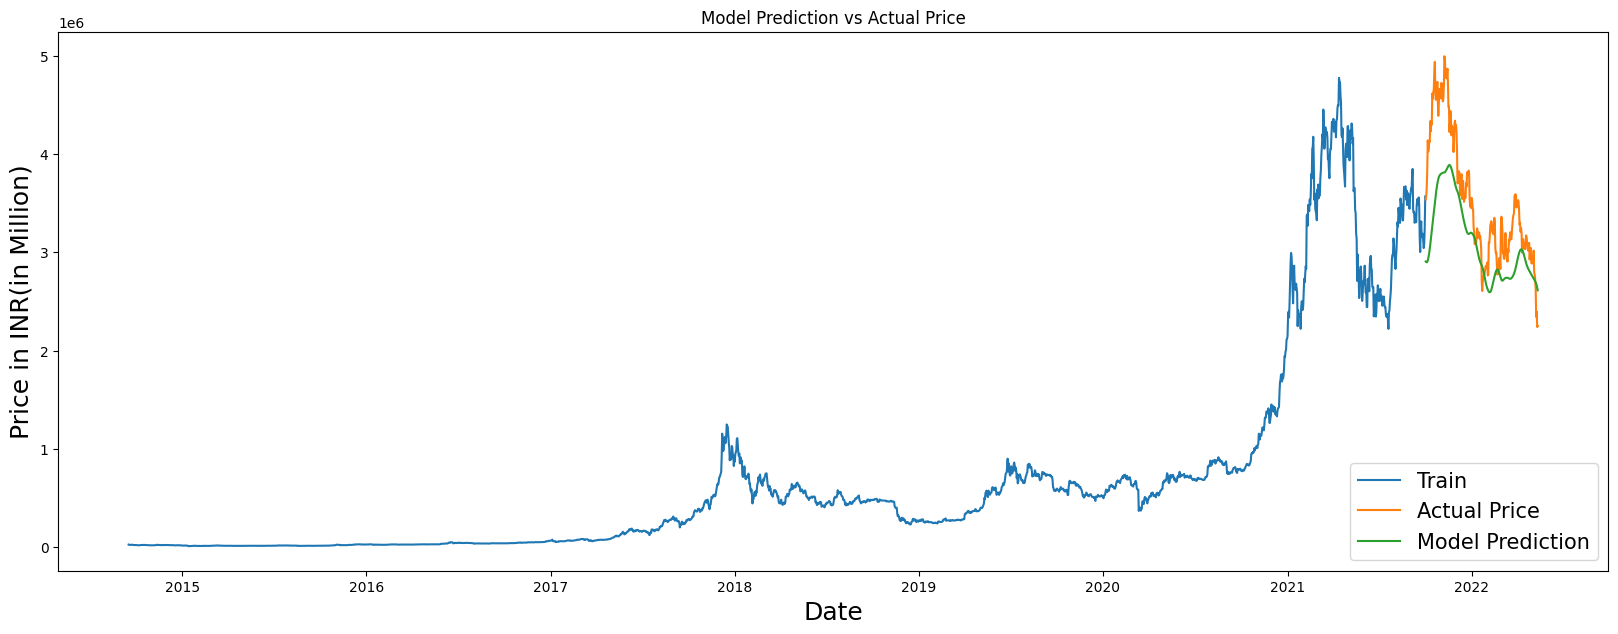

In [98]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

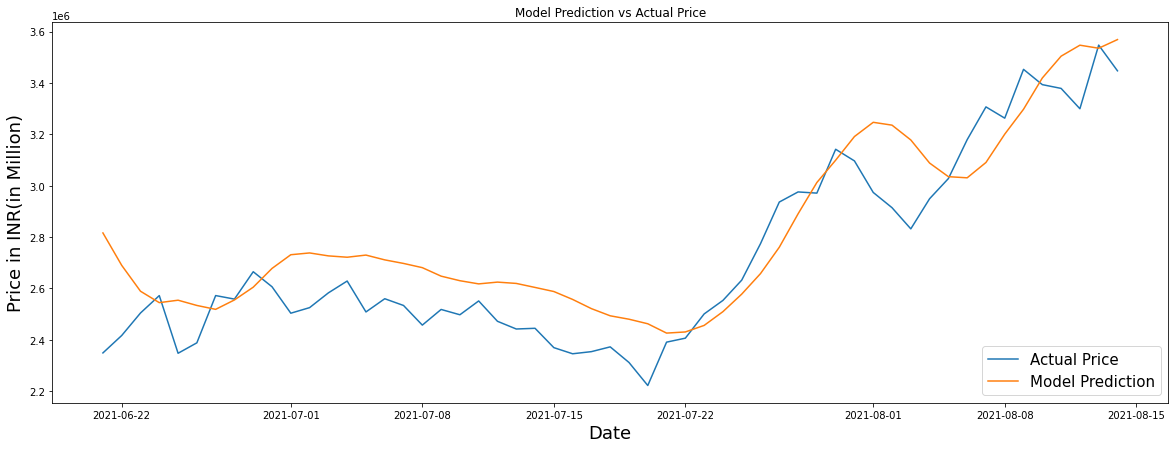

In [57]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [99]:
valid_data.head(30)

,Close,predictions
Date,,
2021-10-02 00:00:00+00:00,3537914.00,2906761.75
2021-10-03 00:00:00+00:00,3574140.25,2899941.25
2021-10-04 00:00:00+00:00,3662498.25,2898940.00
2021-10-05 00:00:00+00:00,3841122.50,2904066.50
2021-10-06 00:00:00+00:00,4139246.00,2916006.25
2021-10-07 00:00:00+00:00,4026320.25,2936301.75
2021-10-08 00:00:00+00:00,4064102.50,2964058.00
2021-10-09 00:00:00+00:00,4129844.50,2998020.75
2021-10-10 00:00:00+00:00,4124631.50,3036924.50


## ON BITCOIN

In [100]:
df_test=bitcoin.history(start='2001-01-19', end='2021-05-13', actions=False)

In [101]:
df_test.head(1)

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,28443.328125,28542.228516,27552.5,27851.640625,1282359120


In [102]:
df_test=df_test.drop(['Open','High','Volume','Low'],axis=1)

In [103]:
test_value=df_test[-60:].values

In [104]:
test_value

array([[4310706.5 ],
       [4054141.25],
       [4119249.75],
       [4272263.5 ],
       [4204622.  ],
       [4226751.  ],
       [4224360.  ],
       [4165414.75],
       [3946860.5 ],
       [3974729.  ],
       [3833831.5 ],
       [3754396.75],
       [3994554.75],
       [4055135.  ],
       [4053488.75],
       [4200873.5 ],
       [4327242.  ],
       [4313079.  ],
       [4330986.5 ],
       [4357392.5 ],
       [4226751.5 ],
       [4311483.  ],
       [4327746.5 ],
       [4276035.5 ],
       [4170133.5 ],
       [4347744.  ],
       [4352631.5 ],
       [4468330.5 ],
       [4499101.5 ],
       [4491485.5 ],
       [4774301.  ],
       [4734890.5 ],
       [4731307.5 ],
       [4591076.5 ],
       [4524215.5 ],
       [4191673.  ],
       [4172547.  ],
       [4260859.5 ],
       [4066144.75],
       [3886924.75],
       [3825294.75],
       [3747273.5 ],
       [3668868.  ],
       [4041646.  ],
       [4104108.5 ],
       [4074136.75],
       [3968757.5 ],
       [42790

In [105]:
test_value=min_max_scalar.transform(test_value)

In [106]:
test=[]
test.append(test_value)

In [107]:
test

[array([[0.86279451],
        [0.81131051],
        [0.82437559],
        [0.8550803 ],
        [0.84150693],
        [0.84594747],
        [0.84546768],
        [0.83363935],
        [0.78978288],
        [0.79537515],
        [0.76710177],
        [0.75116189],
        [0.79935351],
        [0.81150992],
        [0.81117957],
        [0.84075473],
        [0.86611263],
        [0.86327059],
        [0.86686402],
        [0.87216282],
        [0.84594757],
        [0.86295033],
        [0.86621387],
        [0.85583721],
        [0.83458625],
        [0.87022669],
        [0.87120745],
        [0.89442434],
        [0.90059904],
        [0.89907077],
        [0.95582231],
        [0.94791395],
        [0.94719496],
        [0.91905532],
        [0.90563857],
        [0.8389085 ],
        [0.83507055],
        [0.8527919 ],
        [0.81371921],
        [0.77775579],
        [0.76538873],
        [0.74973249],
        [0.73399915],
        [0.80880313],
        [0.82133725],
        [0

In [108]:
test=np.array(test)

In [109]:
test

array([[[0.86279451],
        [0.81131051],
        [0.82437559],
        [0.8550803 ],
        [0.84150693],
        [0.84594747],
        [0.84546768],
        [0.83363935],
        [0.78978288],
        [0.79537515],
        [0.76710177],
        [0.75116189],
        [0.79935351],
        [0.81150992],
        [0.81117957],
        [0.84075473],
        [0.86611263],
        [0.86327059],
        [0.86686402],
        [0.87216282],
        [0.84594757],
        [0.86295033],
        [0.86621387],
        [0.85583721],
        [0.83458625],
        [0.87022669],
        [0.87120745],
        [0.89442434],
        [0.90059904],
        [0.89907077],
        [0.95582231],
        [0.94791395],
        [0.94719496],
        [0.91905532],
        [0.90563857],
        [0.8389085 ],
        [0.83507055],
        [0.8527919 ],
        [0.81371921],
        [0.77775579],
        [0.76538873],
        [0.74973249],
        [0.73399915],
        [0.80880313],
        [0.82133725],
        [0

In [110]:
test=np.reshape(test,(test.shape[0],test.shape[1],1))

In [111]:
tomorrow_prediction=model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [112]:
tomorrow_prediction=min_max_scalar.inverse_transform(tomorrow_prediction)

In [113]:
tomorrow_prediction

array([[3509453.]], dtype=float32)

## SAVE MODEL

In [114]:
model.save("Bitcoin_price_prediction.h5")